## Descripció

Anem a practicar i a familiaritzar-nos amb algoritmes de classificació.

## Nivell 1

**- Exercici 1:**
Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv. Considera si el vol ha arribat tard o no (ArrDelay > 0).


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from imblearn.metrics import geometric_mean_score
from sklearn.model_selection import cross_val_score
from pycaret.classification import *


%matplotlib inline   

Baixem la base de dades i la netegem de la mateixa manera que el exercici anterior:

In [2]:
flights2008_df=pd.read_csv("C:\\Users\\march\\000 Treball Ju`yter 000\\Sprints_IT Academy_Data Science\\Sprint_9\\DelayedFlights.csv" )

In [3]:
flights2008_df.drop(['Year'],axis=1,inplace=True) #eliminem l'any perquè tots els vols són del mateix any!!
flights2008_df['TailNum'].fillna(value='Unknown',inplace=True) #canviem vols sens número de cua per unknown

In [4]:
flights2008_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
flights2008_df.ArrDelay=flights2008_df.ArrDelay.map(lambda x: 0 if x<=0 else 1)
flights2008_df.groupby('ArrDelay').count()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
ArrDelay,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,204956,204956,204956,204956,204956,204956,204956,204956,204956,204956,204956,204956,204956,204956,204956,204956,204956,204956,204956,204956,204956,204956,0,0,0,0,0
1,1731802,1731802,1731802,1731802,1731802,1724692,1731802,1731802,1731802,1731802,1723415,1731604,1723415,1731802,1731802,1731802,1731802,1724692,1731347,1731802,1731802,1731802,1247488,1247488,1247488,1247488,1247488


In [6]:
flights2008_df.ArrDelay.value_counts(normalize=True)

1    0.894176
0    0.105824
Name: ArrDelay, dtype: float64

In [7]:
flights2008_df.isnull().sum()

Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   0
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

Per les que el retras és nul, posem a 0 els retrassos diferents on no constava cap valor:

In [8]:

for i in ['CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']:
    flights2008_df.loc[(flights2008_df.ArrDelay==0)&(flights2008_df[i].isnull()),i ]=0

flights2008_df.loc[(flights2008_df.ArrDelay==0)&(flights2008_df['ArrTime'].isnull()),'ArrTime']=flights2008_df.CRSArrTime

flights2008_df.isnull().sum()

Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   0
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         484314
WeatherDelay         484314
NASDelay             484314
SecurityDelay        484314
LateAircraftDelay    484314
dtype: int64

In [9]:
for i in [ 'ArrTime','ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'TaxiIn', 'TaxiOut',
       'CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']:
       buit= flights2008_df[(flights2008_df.ArrDelay==0)&(flights2008_df[i].isnull())].count().Month
       print (f'{i} té {buit} instancies buides (nan) on no hi hagi retras.')

ArrTime té 0 instancies buides (nan) on no hi hagi retras.
ActualElapsedTime té 0 instancies buides (nan) on no hi hagi retras.
CRSElapsedTime té 0 instancies buides (nan) on no hi hagi retras.
AirTime té 0 instancies buides (nan) on no hi hagi retras.
TaxiIn té 0 instancies buides (nan) on no hi hagi retras.
TaxiOut té 0 instancies buides (nan) on no hi hagi retras.
CarrierDelay té 0 instancies buides (nan) on no hi hagi retras.
WeatherDelay té 0 instancies buides (nan) on no hi hagi retras.
NASDelay té 0 instancies buides (nan) on no hi hagi retras.
SecurityDelay té 0 instancies buides (nan) on no hi hagi retras.
LateAircraftDelay té 0 instancies buides (nan) on no hi hagi retras.


In [10]:
#Com que no hi han dates de vols no retrassat, es procedeix a eliminar els valors nuls:
index=list(flights2008_df[flights2008_df['LateAircraftDelay'].isnull()].index)#index de vols que tenen distancia nul
flights2008_df.drop(index=index, inplace=True)
flights2008_df.isnull().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

Al netejar el dataframe no queden vols cancelats. Es poden borrar totes les columnes referents a la cancelació i desviació de vols.

In [11]:
flights2008_df.ArrDelay.value_counts(normalize=True) 

1    0.858889
0    0.141111
Name: ArrDelay, dtype: float64

Per a facilitar el funcionament dels models en l'ordinador cal reduir la base de dades amb una mostra més petita però representativa del total. D'altra banda, només treballarem amb les columnes numèriques, així que procedim a agafar data frame on només estiguin aquestes (df_small):

In [12]:
# Eliminem les dades no numèriques del Dataframe:
df_small=flights2008_df.sample(n=50000,random_state=42)
objectiu=list(df_small.ArrDelay)     
df_small.drop('ArrDelay', axis=1, inplace=True)
categor_index=df_small.dtypes[df_small.dtypes!='object'].index
df_small=df_small[categor_index]
df_small.head()[:2]

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
515702,3,12,3,1911.0,1847,2236.0,2211,552,145.0,144.0,120.0,24.0,936,6.0,19.0,0,0,24.0,0.0,1.0,0.0,0.0
466285,3,17,1,1033.0,935,1152.0,1059,322,79.0,84.0,60.0,58.0,397,9.0,10.0,0,0,0.0,0.0,0.0,0.0,53.0


In [13]:
flights2008_df[flights2008_df!='object'].describe()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.452444e+06,1.452444e+06,1.452444e+06,1.452444e+06,1.452444e+06,1.452444e+06,1.452444e+06,1.452444e+06,1.452444e+06,1.452444e+06,1.452444e+06,1.452444e+06,1.452444e+06,1.452444e+06,1.452444e+06,1.452444e+06,1452444.0,1452444.0,1.452444e+06,1.452444e+06,1.452444e+06,1.452444e+06,1.452444e+06
mean,6.097562e+00,1.574060e+01,3.985420e+00,1.541254e+03,1.479048e+03,1.615064e+03,1.646406e+03,2.217235e+03,1.369914e+02,1.361988e+02,1.103387e+02,8.588889e-01,5.272265e+01,7.758606e+02,7.079644e+00,1.957304e+01,0.0,0.0,1.647297e+01,3.180956e+00,1.290192e+01,7.741779e-02,2.172685e+01
std,3.505500e+00,8.785549e+00,1.996281e+00,4.535936e+02,4.228456e+02,5.700608e+02,4.649249e+02,1.970011e+03,7.310202e+01,7.194988e+01,6.955847e+01,3.481363e-01,5.810674e+01,5.797217e+02,5.728638e+00,1.583603e+01,0.0,0.0,4.090562e+01,1.996050e+01,3.178832e+01,1.874838e+00,3.995744e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01,-2.100000e+01,0.000000e+00,0.000000e+00,6.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,8.000000e+00,2.000000e+00,1.219000e+03,1.145000e+03,1.323000e+03,1.335000e+03,6.190000e+02,8.300000e+01,8.400000e+01,5.900000e+01,1.000000e+00,1.700000e+01,3.450000e+02,4.000000e+00,1.100000e+01,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.000000e+00,1.600000e+01,4.000000e+00,1.605000e+03,1.520000e+03,1.730000e+03,1.718000e+03,1.555000e+03,1.200000e+02,1.190000e+02,9.200000e+01,1.000000e+00,3.500000e+01,6.170000e+02,6.000000e+00,1.500000e+01,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,9.000000e+00,2.300000e+01,6.000000e+00,1.914000e+03,1.825000e+03,2.041000e+03,2.020000e+03,3.514000e+03,1.690000e+02,1.660000e+02,1.400000e+02,1.000000e+00,6.700000e+01,1.009000e+03,8.000000e+00,2.300000e+01,0.0,0.0,1.700000e+01,0.000000e+00,1.100000e+01,0.000000e+00,2.800000e+01
max,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.359000e+03,9.741000e+03,1.114000e+03,6.600000e+02,1.091000e+03,1.000000e+00,2.467000e+03,4.962000e+03,2.400000e+02,4.220000e+02,0.0,0.0,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [14]:
df_small.describe()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,6.114880,15.768500,3.970700,1538.292440,1477.127400,1611.876040,1644.086960,2212.540320,136.352400,135.654760,109.927420,52.489040,772.249580,7.043340,19.381640,0.0,0.0,16.471260,3.27206,12.638700,0.076100,21.568800
std,3.509736,8.777203,2.003338,454.299442,423.274577,569.963621,465.759502,1960.254065,73.084855,71.862424,69.489489,59.422274,579.122161,5.684937,15.547533,0.0,0.0,41.516166,20.99843,31.273871,1.900984,40.177262
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,24.000000,1.000000,6.000000,31.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000
25%,3.000000,8.000000,2.000000,1216.000000,1140.000000,1319.000000,1330.000000,619.000000,83.000000,83.000000,59.000000,17.000000,342.000000,4.000000,11.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000
50%,6.000000,16.000000,4.000000,1603.000000,1520.000000,1728.000000,1716.000000,1562.000000,119.000000,118.000000,92.000000,35.000000,612.000000,6.000000,15.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000
75%,9.000000,23.000000,6.000000,1912.000000,1825.000000,2041.000000,2020.000000,3491.250000,169.000000,165.000000,139.000000,66.000000,1005.000000,8.000000,22.000000,0.0,0.0,17.000000,0.00000,11.000000,0.000000,27.000000
max,12.000000,31.000000,7.000000,2400.000000,2359.000000,2400.000000,2359.000000,7829.000000,682.000000,660.000000,649.000000,2457.000000,4962.000000,138.000000,393.000000,0.0,0.0,1455.000000,847.00000,761.000000,280.000000,1002.000000


Comparem les dues bases de dades i els promitjos són molt semblants.

Hi ha molts més vols amb retard que sense 85.9% vs 14.1% del total), s'haurà de treballar amb 2 classes desbalancejades. Cal veure quin model podem fer servir, per tal d'avaluar el model també és molt important determinar quin és el paràmetre que ens permet comparar entre mètodes. A la bibliografia trobem que per a un problema de classificació entre classes, on li donem donem igual valor a les dues i la classe majoritària representa >80% del total de valors, el paràmetre a seguir seria la G-Mean.

## Funcions generiques


In [15]:
def check_classification_method(method_classifier,features,label, random): #si random=0 serà aletori!
    if random==0:
        random_state=None
    X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.20, random_state=random)
    method=method_classifier
    method.fit(X_train, list(y_train))
    prediction= method.predict(X_test)
    return  prediction,y_test

# Retorna una lista con metrica de classificacion accuracy, matrix confusion, G-Mean, f1 score + informe 
# Generem DataFrame per a contenir després els resultats.

metrics_df = pd.DataFrame(columns = ['Model', 'Accuracy' , 'Confusion Matrix', 'G-Mean'])

def check_prediction(prediction,real):
    list=[]
    accuracy=accuracy_score(real,prediction)
    confusion=confusion_matrix(real, prediction)
    gmean_score=round(geometric_mean_score(real, prediction,average = 'binary'),3)
    f1=f1_score(real, prediction, average='binary', sample_weight=None, zero_division='warn')
    list_metrics=[accuracy, confusion,gmean_score,f1]
    report= classification_report(real, prediction)
    return list_metrics, report

### Provem models

In [16]:
metrics_df.drop(metrics_df.index,inplace=True)

In [17]:

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    ]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    ]

j=0
resultats_llista=[]


for i in classifiers:
    prediction, real = check_classification_method(i,df_small,objectiu,0)
    resultats_llista.append([names[j], prediction, real])
    metric_list, inform  = check_prediction (prediction, real)
    print ('* '*5,names[j],' *'*5)
    print(f'Accuracy {metric_list[0]}')
    print('confusion matrix', metric_list[1])
    print('G-Mean:', metric_list[2])
    nou_registre={'Model':names[j], 'Accuracy':metric_list[0] , 
                'Confusion Matrix':metric_list[1], 
                'G-Mean':metric_list[2]}
    metrics_df= metrics_df.append(nou_registre,ignore_index=True)
    print('')
    j+=1



* * * * *  Nearest Neighbors  * * * * *
Accuracy 0.8582
confusion matrix [[ 443  990]
 [ 428 8139]]
G-Mean: 0.542

* * * * *  Linear SVM  * * * * *
Accuracy 1.0
confusion matrix [[1433    0]
 [   0 8567]]
G-Mean: 1.0

* * * * *  Decision Tree  * * * * *
Accuracy 0.9904
confusion matrix [[1349   84]
 [  12 8555]]
G-Mean: 0.97

* * * * *  Random Forest  * * * * *
Accuracy 0.8622
confusion matrix [[  55 1378]
 [   0 8567]]
G-Mean: 0.196

* * * * *  Neural Net  * * * * *
Accuracy 0.9994
confusion matrix [[1429    4]
 [   2 8565]]
G-Mean: 0.998



In [18]:
names = [
    "AdaBoost",
    "QDA",
]
classifiers = [
    AdaBoostClassifier(),
    QuadraticDiscriminantAnalysis()
    ]

j=0
resultats_llista=[]

for i in classifiers:
    prediction, real = check_classification_method(i,df_small,objectiu,0)
    resultats_llista.append([names[j], prediction, real])
    metric_list, inform  = check_prediction (prediction, real)
    print ('* '*5,names[j],' *'*5)
    print(f'Accuracy {metric_list[0]}')
    print('confusion matrix', metric_list[1])
    print('G-Mean:', metric_list[2])
    nou_registre={'Model':names[j], 'Accuracy':metric_list[0] , 
                'Confusion Matrix':metric_list[1], 
                'G-Mean':metric_list[2]}
    metrics_df= metrics_df.append(nou_registre,ignore_index=True)
    print()
    j+=1


* * * * *  AdaBoost  * * * * *
Accuracy 1.0
confusion matrix [[1433    0]
 [   0 8567]]
G-Mean: 1.0

* * * * *  QDA  * * * * *
Accuracy 0.1433
confusion matrix [[1433    0]
 [8567    0]]
G-Mean: 0.0



In [19]:
names = [
    "Gradient Boosting",
    "Naive Bayes"
]
classifiers = [
    GradientBoostingClassifier(),
    GaussianNB()
    ]

j=0
resultats_llista=[]

for i in classifiers:
    prediction, real = check_classification_method(i,df_small,objectiu,0)
    resultats_llista.append([names[j], prediction, real])
    metric_list, inform  = check_prediction (prediction, real)
    print ('* '*5,names[j],' *'*5)
    print(f'Accuracy {metric_list[0]}')
    print('confusion matrix', metric_list[1])
    print('G-Mean:', metric_list[2])
    nou_registre={'Model':names[j], 'Accuracy':metric_list[0] , 
                'Confusion Matrix':metric_list[1], 
                'G-Mean':metric_list[2]}
    metrics_df= metrics_df.append(nou_registre,ignore_index=True)
    print()
    j+=1



* * * * *  Gradient Boosting  * * * * *
Accuracy 1.0
confusion matrix [[1433    0]
 [   0 8567]]
G-Mean: 1.0

* * * * *  Naive Bayes  * * * * *
Accuracy 1.0
confusion matrix [[1433    0]
 [   0 8567]]
G-Mean: 1.0



()

L'accuracy ha de ser >0.86 per a millorar la proporció real de la classe majoritària. S'observa que hi ha 2 casos on:
  1. Els mètode donen una precissó que és anàlogo a la proporció de la classe majoritària. Indica que la classificació no és bona per a la classe minòritaria.
  2. Els mètodes donen una precissió i exactitud màxima perquè han trobat els parametres que correlacionen directament amb el retard.

Fonts d'informació per a la selecció del model:
https://machinelearningmastery.com/framework-for-imbalanced-classification-projects/

Evaluació de model de classificació per a classes imbalancejades:
http://glemaitre.github.io/imbalanced-learn/generated/imblearn.metrics.geometric_mean_score.html

https://stackabuse.com/overview-of-classification-methods-in-python-with-scikit-learn/


![imagen](https://machinelearningmastery.com/wp-content/uploads/2019/12/How-to-Choose-a-Metric-for-Imbalanced-Classification-latest.png)

**- Exercici 2:**
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.

El càlcul s'ha fet durant l'exercici 1, els resultats estan resumits en el dataframe metrics_df on he inclòs la G-Mean que seria la mètrica més adequada per a valorar el cas que tenim (classe majoritaria >80%població, les classes són igual d'importants):

In [20]:
metrics_df

,Model,Accuracy,Confusion Matrix,G-Mean
0,Nearest Neighbors,0.8582,"[[443, 990], [428, 8139]]",0.542
1,Linear SVM,1.0000,"[[1433, 0], [0, 8567]]",1.000
2,Decision Tree,0.9904,"[[1349, 84], [12, 8555]]",0.970
3,Random Forest,0.8622,"[[55, 1378], [0, 8567]]",0.196
4,Neural Net,0.9994,"[[1429, 4], [2, 8565]]",0.998
5,AdaBoost,1.0000,"[[1433, 0], [0, 8567]]",1.000
6,QDA,0.1433,"[[1433, 0], [8567, 0]]",0.000
7,Gradient Boosting,1.0000,"[[1433, 0], [0, 8567]]",1.000
8,Naive Bayes,1.0000,"[[1433, 0], [0, 8567]]",1.000


 **- Exercici 3:** Entrena’ls utilitzant els diferents paràmetres que admeten.


Procedeixo a optimitzar algunes de les metodologies que han donat més baixes: 
### Optimització K-Nearest Neighbours

In [21]:
## Optimització del K Neighbours Classifier
knn_optim_df = pd.DataFrame(columns = ['n-neighbours', 'Weights' , 'Confusion Matrix','Accuracy', 'G-Mean'])
j=0
for weights_mode in ['uniform', 'distance']:
    for i in [1,3,5,7,9,11]:
        prediction, real = check_classification_method(KNeighborsClassifier(n_neighbors=i, 
                            weights=weights_mode),df_small,objectiu,0)
        metric_list, inform  = check_prediction (prediction, real)
        print ('* '*3,f' K Neighbours classifier n={i} and mode={weights_mode}.',' *'*3)
        print(f'Accuracy {metric_list[0]}')
        print('G-Mean:', metric_list[2])
        nou_registre={'n-neighbours':i, 
                    'Weights':weights_mode, 
                    'Confusion Matrix': metric_list[1],
                    'Accuracy':metric_list[0] , 
                    'G-Mean':metric_list[2]}                    
        knn_optim_df= knn_optim_df.append(nou_registre,ignore_index=True)
        print('')
        j+=1
knn_optim_df


* * *   K Neighbours classifier n=1 and mode=uniform.  * * *
Accuracy 0.8518
G-Mean: 0.63

* * *   K Neighbours classifier n=3 and mode=uniform.  * * *
Accuracy 0.8582
G-Mean: 0.542

* * *   K Neighbours classifier n=5 and mode=uniform.  * * *
Accuracy 0.8595
G-Mean: 0.454

* * *   K Neighbours classifier n=7 and mode=uniform.  * * *
Accuracy 0.8633
G-Mean: 0.405

* * *   K Neighbours classifier n=9 and mode=uniform.  * * *
Accuracy 0.8628
G-Mean: 0.357

* * *   K Neighbours classifier n=11 and mode=uniform.  * * *
Accuracy 0.8619
G-Mean: 0.312

* * *   K Neighbours classifier n=1 and mode=distance.  * * *
Accuracy 0.8518
G-Mean: 0.63

* * *   K Neighbours classifier n=3 and mode=distance.  * * *
Accuracy 0.8642
G-Mean: 0.583

* * *   K Neighbours classifier n=5 and mode=distance.  * * *
Accuracy 0.8677
G-Mean: 0.533

* * *   K Neighbours classifier n=7 and mode=distance.  * * *
Accuracy 0.8723
G-Mean: 0.502

* * *   K Neighbours classifier n=9 and mode=distance.  * * *
Accuracy 0.8717

,n-neighbours,Weights,Confusion Matrix,Accuracy,G-Mean
0,1,uniform,"[[617, 816], [666, 7901]]",0.8518,0.630
1,3,uniform,"[[443, 990], [428, 8139]]",0.8582,0.542
2,5,uniform,"[[305, 1128], [277, 8290]]",0.8595,0.454
3,7,uniform,"[[240, 1193], [174, 8393]]",0.8633,0.405
4,9,uniform,"[[185, 1248], [124, 8443]]",0.8628,0.357
5,11,uniform,"[[141, 1292], [89, 8478]]",0.8619,0.312
6,1,distance,"[[617, 816], [666, 7901]]",0.8518,0.630
7,3,distance,"[[513, 920], [438, 8129]]",0.8642,0.583
8,5,distance,"[[423, 1010], [313, 8254]]",0.8677,0.533
9,7,distance,"[[371, 1062], [215, 8352]]",0.8723,0.502


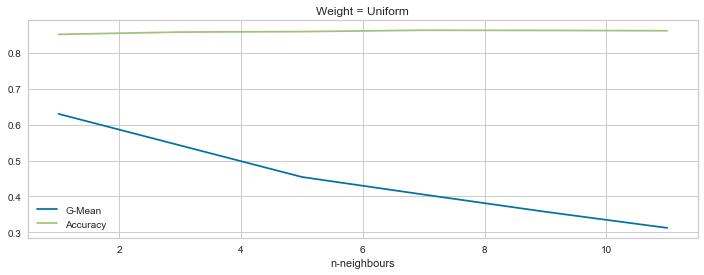

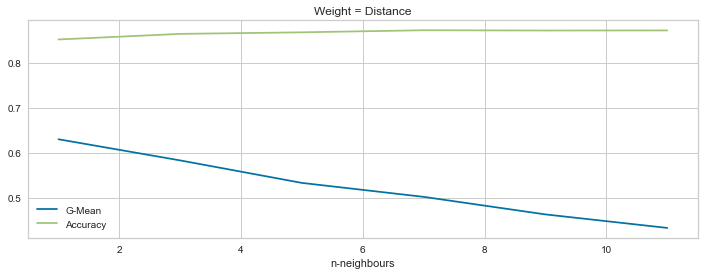

In [22]:
fig, axs = plt.subplots(figsize=(12, 4))
knn_optim_df[knn_optim_df.Weights=='uniform'].plot(x='n-neighbours', y=['G-Mean','Accuracy'],ax=axs)
axs.set_title('Weight = Uniform')
fig2, axs2 = plt.subplots(figsize=(12, 4))
knn_optim_df[knn_optim_df.Weights=='distance'].plot(x='n-neighbours',y=['G-Mean','Accuracy'], ax=axs2)
axs2.set_title('Weight = Distance')
plt.show()



Com era lògic, la classe minoritaria es veu beneficiada quan menys n-neighbours s'agafin (haurien de ser 1 o 3), la millor modalitat dels pesos es en referència a la distàncis (wheights=distance).

### Optimització del Random Forest Classifier


In [23]:
rf_optim_df = pd.DataFrame(columns = ['n-estimator', 'max_depth' , 'Confusion Matrix','Accuracy', 'G-Mean'])
rf_optim_df.drop(index=rf_optim_df.index, inplace=True)
max_depth_list=[5,10,15,20,25]
n_estimator_list=[20, 50, 300, 750]
j=0
for n_estimator in n_estimator_list:
    for max_depth  in max_depth_list:
        prediction, real = check_classification_method(RandomForestClassifier(random_state = 1, 
                                    n_estimators = n_estimator, max_depth=max_depth),df_small,objectiu,0)
        metric_list, inform  = check_prediction (prediction, real)
        print ('* '*3,f' Random Forest classifier # Estimators={n_estimator} and max_depth={max_depth}.',' *'*3)
        print(f'Accuracy {metric_list[0]}')
        print('G-Mean:', metric_list[2])
        nou_registre={'n-estimator':n_estimator, 
                    'max_depth':max_depth, 
                    'Confusion Matrix': metric_list[1],
                    'Accuracy':metric_list[0] , 
                    'G-Mean':metric_list[2]}                    
        rf_optim_df= rf_optim_df.append(nou_registre,ignore_index=True)
        print('')
        j+=1


* * *   Random Forest classifier # Estimators=20 and max_depth=5.  * * *
Accuracy 0.9888
G-Mean: 0.96

* * *   Random Forest classifier # Estimators=20 and max_depth=10.  * * *
Accuracy 0.9987
G-Mean: 0.996

* * *   Random Forest classifier # Estimators=20 and max_depth=15.  * * *
Accuracy 0.9985
G-Mean: 0.997

* * *   Random Forest classifier # Estimators=20 and max_depth=20.  * * *
Accuracy 0.9991
G-Mean: 0.998

* * *   Random Forest classifier # Estimators=20 and max_depth=25.  * * *
Accuracy 0.999
G-Mean: 0.998

* * *   Random Forest classifier # Estimators=50 and max_depth=5.  * * *
Accuracy 0.9883
G-Mean: 0.959

* * *   Random Forest classifier # Estimators=50 and max_depth=10.  * * *
Accuracy 0.9987
G-Mean: 0.996

* * *   Random Forest classifier # Estimators=50 and max_depth=15.  * * *
Accuracy 0.9992
G-Mean: 0.999

* * *   Random Forest classifier # Estimators=50 and max_depth=20.  * * *
Accuracy 0.999
G-Mean: 0.998

* * *   Random Forest classifier # Estimators=50 and max_dep

In [24]:
rf_optim_df

,n-estimator,max_depth,Confusion Matrix,Accuracy,G-Mean
0,20,5,"[[1322, 111], [1, 8566]]",0.9888,0.960
1,20,10,"[[1423, 10], [3, 8564]]",0.9987,0.996
2,20,15,"[[1426, 7], [8, 8559]]",0.9985,0.997
3,20,20,"[[1429, 4], [5, 8562]]",0.9991,0.998
4,20,25,"[[1428, 5], [5, 8562]]",0.9990,0.998
5,50,5,"[[1317, 116], [1, 8566]]",0.9883,0.959
6,50,10,"[[1423, 10], [3, 8564]]",0.9987,0.996
7,50,15,"[[1430, 3], [5, 8562]]",0.9992,0.999
8,50,20,"[[1428, 5], [5, 8562]]",0.9990,0.998
9,50,25,"[[1430, 3], [5, 8562]]",0.9992,0.999


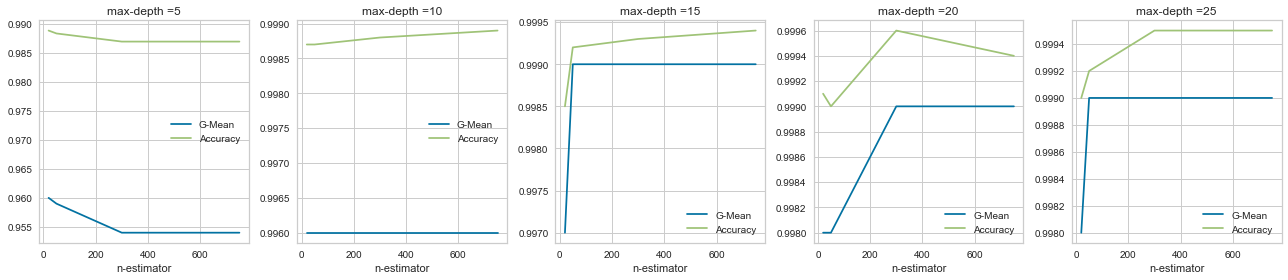

In [25]:
fig, axs = plt.subplots(figsize=(18, 4),ncols=5)
j=0
for i in max_depth_list:
    rf_optim_df[rf_optim_df.max_depth==i].plot(x='n-estimator', y=['G-Mean','Accuracy'],ax=axs[j])
    axs[j].set_title(f'max-depth ={i}')
    fig.tight_layout()
    j+=1
    
plt.show()



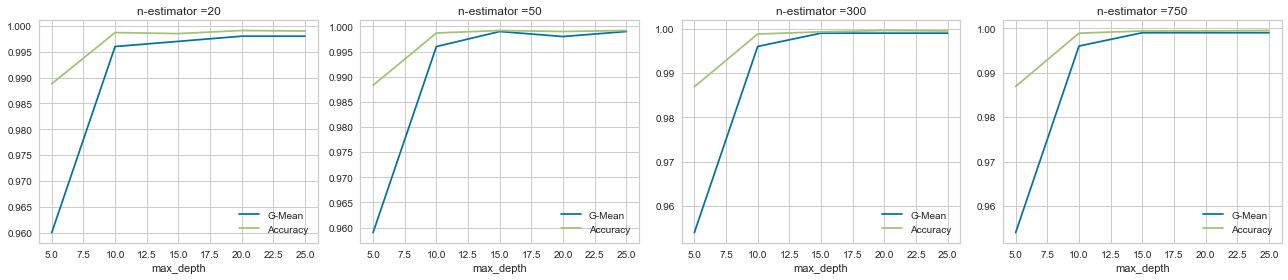

In [26]:
fig2, axs2 = plt.subplots(figsize=(18, 4),ncols=4)
j=0
for i in n_estimator_list:
    rf_optim_df[rf_optim_df['n-estimator']==i].plot(x='max_depth', y=['G-Mean','Accuracy'],ax=axs2[j])
    axs2[j].set_title(f'n-estimator ={i}')
    fig2.tight_layout()
    j+=1
    
plt.show()



Es pot concloure que els paràmetres òptims per al random Forest serien un n-estimator= 300 amb una max_depth=20. El canvi ha estat molt gran respecte la dada inicial que partia d'un n_estimator molt baix.

### Optimització del Decision Tree Classifier


In [27]:
criterion = ['gini', 'entropy']
max_depth_list = [2,4,6,8,10,12]
dtc_optim_df = pd.DataFrame(columns = ['Criterion', 'max_depth' , 'Confusion Matrix','Accuracy', 'G-Mean'])
dtc_optim_df.drop(index=dtc_optim_df.index, inplace=True)

j=0
for crit in criterion:
    for max_depth  in max_depth_list:
        
        prediction, real = check_classification_method(DecisionTreeClassifier(criterion=crit, max_depth=max_depth),df_small,objectiu,0)
        metric_list, inform  = check_prediction (prediction, real)
        print ('* '*3,f' Decision Tree classifier # Criteria={crit} and max_depth={max_depth}.',' *'*3)
        print(f'Accuracy {metric_list[0]}')
        print('G-Mean:', metric_list[2])
        nou_registre={'Criterion':crit, 
                    'max_depth':max_depth, 
                    'Confusion Matrix': metric_list[1],
                    'Accuracy':metric_list[0] , 
                    'G-Mean':metric_list[2]}                    
        dtc_optim_df= dtc_optim_df.append(nou_registre,ignore_index=True)
        print('')
        j+=1

* * *   Decision Tree classifier # Criteria=gini and max_depth=2.  * * *
Accuracy 0.9699
G-Mean: 0.899

* * *   Decision Tree classifier # Criteria=gini and max_depth=4.  * * *
Accuracy 0.9866
G-Mean: 0.967

* * *   Decision Tree classifier # Criteria=gini and max_depth=6.  * * *
Accuracy 0.9959
G-Mean: 0.99

* * *   Decision Tree classifier # Criteria=gini and max_depth=8.  * * *
Accuracy 0.9973
G-Mean: 0.991

* * *   Decision Tree classifier # Criteria=gini and max_depth=10.  * * *
Accuracy 0.9982
G-Mean: 0.995

* * *   Decision Tree classifier # Criteria=gini and max_depth=12.  * * *
Accuracy 0.9983
G-Mean: 0.996

* * *   Decision Tree classifier # Criteria=entropy and max_depth=2.  * * *
Accuracy 0.9795
G-Mean: 0.946

* * *   Decision Tree classifier # Criteria=entropy and max_depth=4.  * * *
Accuracy 0.9853
G-Mean: 0.949

* * *   Decision Tree classifier # Criteria=entropy and max_depth=6.  * * *
Accuracy 0.9984
G-Mean: 0.998

* * *   Decision Tree classifier # Criteria=entropy an

In [28]:
dtc_optim_df

,Criterion,max_depth,Confusion Matrix,Accuracy,G-Mean
0,gini,2,"[[1162, 271], [30, 8537]]",0.9699,0.899
1,gini,4,"[[1349, 84], [50, 8517]]",0.9866,0.967
2,gini,6,"[[1408, 25], [16, 8551]]",0.9959,0.990
3,gini,8,"[[1409, 24], [3, 8564]]",0.9973,0.991
4,gini,10,"[[1421, 12], [6, 8561]]",0.9982,0.995
5,gini,12,"[[1422, 11], [6, 8561]]",0.9983,0.996
6,entropy,2,"[[1291, 142], [63, 8504]]",0.9795,0.946
7,entropy,4,"[[1291, 142], [5, 8562]]",0.9853,0.949
8,entropy,6,"[[1428, 5], [11, 8556]]",0.9984,0.998
9,entropy,8,"[[1433, 0], [1, 8566]]",0.9999,1.000


Els millors paràmetres són el criteri 'entropy' i max_depth=10.

Optimitzant els hiperparàmetres del decission tree classifier:

https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680

https://www.projectpro.io/recipes/optimize-hyper-parameters-of-decisiontree-model-using-grid-search-in-python


**- Exercici 4:** Compara el seu rendiment utilitzant l’aproximació traint/test o cross-validation.



Comparem el rendiment de les metodologies que s'han optimitzat:

### K-Neighbours Classifiers

In [29]:
knClass=KNeighborsClassifier(n_neighbors=3, 
                            weights='distance')
scores = cross_val_score(knClass, df_small, objectiu, cv=5, scoring='accuracy')
print (f'La precicció promig emprant una validació creuada és del {round(scores.mean(),3)} amb una desviació de {round(scores.std(),3)}.')


La precicció promig emprant una validació creuada és del 0.867 amb una desviació de 0.003.


Emprant el train/test era de 0,864 , un valor molt pròxim que estaria dintre de la desviació standard.

### Decision Tree

In [30]:
dtClass=DecisionTreeClassifier(criterion='entropy', max_depth=10)
scores = cross_val_score(dtClass, df_small, objectiu, cv=5, scoring='accuracy')
print (f'La precicció promig emprant una validació creuada és del {round(scores.mean(),3)} amb una desviació de {round(scores.std(),3)}.')


La precicció promig emprant una validació creuada és del 1.0 amb una desviació de 0.0.


Amb la optimització s'aconsegueix una precisió total sense error, en la validació creuada es repeteixen els resultats validant el mètode.

### Random Forest

In [31]:
rfClass=RandomForestClassifier(n_estimators= 300, max_depth=20)
scores = cross_val_score(rfClass, df_small, objectiu, cv=5, scoring='accuracy')
print (f'La precicció promig emprant una validació creuada és del {round(scores.mean(),3)} amb una desviació de {round(scores.std(),3)}.')


La precicció promig emprant una validació creuada és del 1.0 amb una desviació de 0.0.


Amb la optimització s'aconsegueix una precisió total sense error, en la validació creuada es repeteixen els resultats validant el mètode.

## Nivell 2

**- Exercici 5:** Realitza algun procés d’enginyeria de variables per millorar-ne la predicció


Per tal d'incloure les variables categòriques en la regressió lineal es poden transformar en diverses variables dummie:

In [32]:
df_small=flights2008_df.sample(n=50000,random_state=42)
df_small[['Month', 'DayofMonth', 'DayOfWeek']]=df_small[['Month', 'DayofMonth', 'DayOfWeek']].astype('category')
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 515702 to 1532771
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Month              50000 non-null  category
 1   DayofMonth         50000 non-null  category
 2   DayOfWeek          50000 non-null  category
 3   DepTime            50000 non-null  float64 
 4   CRSDepTime         50000 non-null  int64   
 5   ArrTime            50000 non-null  float64 
 6   CRSArrTime         50000 non-null  int64   
 7   UniqueCarrier      50000 non-null  object  
 8   FlightNum          50000 non-null  int64   
 9   TailNum            50000 non-null  object  
 10  ActualElapsedTime  50000 non-null  float64 
 11  CRSElapsedTime     50000 non-null  float64 
 12  AirTime            50000 non-null  float64 
 13  ArrDelay           50000 non-null  int64   
 14  DepDelay           50000 non-null  float64 
 15  Origin             50000 non-null  object  
 1

In [33]:
df_small_dummies=pd.get_dummies(df_small[['Month', 'DayofMonth','DayOfWeek', 'UniqueCarrier']])
df_small_dummies=pd.concat([df_small.drop(['Month', 'DayofMonth','DayOfWeek','UniqueCarrier'],axis=1),
                                            df_small_dummies],axis=1 )

categor_index=df_small.dtypes[df_small.dtypes!='object'].index
df_small=df_small[categor_index]
objectiu=list(df_small.ArrDelay)     
df_small.drop('ArrDelay', axis=1, inplace=True)

df_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 515702 to 1532771
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Month              50000 non-null  category
 1   DayofMonth         50000 non-null  category
 2   DayOfWeek          50000 non-null  category
 3   DepTime            50000 non-null  float64 
 4   CRSDepTime         50000 non-null  int64   
 5   ArrTime            50000 non-null  float64 
 6   CRSArrTime         50000 non-null  int64   
 7   FlightNum          50000 non-null  int64   
 8   ActualElapsedTime  50000 non-null  float64 
 9   CRSElapsedTime     50000 non-null  float64 
 10  AirTime            50000 non-null  float64 
 11  DepDelay           50000 non-null  float64 
 12  Distance           50000 non-null  int64   
 13  TaxiIn             50000 non-null  float64 
 14  TaxiOut            50000 non-null  float64 
 15  Cancelled          50000 non-null  int64   
 1

In [34]:
metrics_df2 = pd.DataFrame(columns = ['Model', 'Accuracy' , 'Confusion Matrix', 'G-Mean'])
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    ]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    ]

j=0
resultats_llista=[]


for i in classifiers:
    prediction, real = check_classification_method(i,df_small,objectiu,0)
    resultats_llista.append([names[j], prediction, real])
    metric_list, inform  = check_prediction (prediction, real)
    print ('* '*5,names[j],' *'*5)
    print(f'Accuracy {metric_list[0]}')
    print('confusion matrix', metric_list[1])
    print('G-Mean:', metric_list[2])
    nou_registre={'Model':names[j], 'Accuracy':metric_list[0] , 
                'Confusion Matrix':metric_list[1], 
                'G-Mean':metric_list[2]}
    metrics_df2= metrics_df2.append(nou_registre,ignore_index=True)
    print('')
    j+=1



* * * * *  Nearest Neighbors  * * * * *
Accuracy 0.8582
confusion matrix [[ 443  990]
 [ 428 8139]]
G-Mean: 0.542

* * * * *  Linear SVM  * * * * *
Accuracy 1.0
confusion matrix [[1433    0]
 [   0 8567]]
G-Mean: 1.0

* * * * *  Decision Tree  * * * * *
Accuracy 0.9904
confusion matrix [[1349   84]
 [  12 8555]]
G-Mean: 0.97

* * * * *  Random Forest  * * * * *
Accuracy 0.8568
confusion matrix [[   1 1432]
 [   0 8567]]
G-Mean: 0.026

* * * * *  Neural Net  * * * * *
Accuracy 0.9992
confusion matrix [[1431    2]
 [   6 8561]]
G-Mean: 0.999



In [35]:
names = [
    "AdaBoost",
    "QDA",
]
classifiers = [
    AdaBoostClassifier(),
    QuadraticDiscriminantAnalysis()
    ]

j=0
resultats_llista=[]

for i in classifiers:
    prediction, real = check_classification_method(i,df_small,objectiu,0)
    resultats_llista.append([names[j], prediction, real])
    metric_list, inform  = check_prediction (prediction, real)
    print ('* '*5,names[j],' *'*5)
    print(f'Accuracy {metric_list[0]}')
    print('confusion matrix', metric_list[1])
    print('G-Mean:', metric_list[2])
    nou_registre={'Model':names[j], 'Accuracy':metric_list[0] , 
                'Confusion Matrix':metric_list[1], 
                'G-Mean':metric_list[2]}
    metrics_df2= metrics_df2.append(nou_registre,ignore_index=True)
    print()
    j+=1


* * * * *  AdaBoost  * * * * *
Accuracy 1.0
confusion matrix [[1433    0]
 [   0 8567]]
G-Mean: 1.0

* * * * *  QDA  * * * * *
Accuracy 0.1433
confusion matrix [[1433    0]
 [8567    0]]
G-Mean: 0.0



In [36]:
names = [
    "Gradient Boosting",
    "Naive Bayes"
]
classifiers = [
    GradientBoostingClassifier(),
    GaussianNB()
    ]

j=0
resultats_llista=[]

for i in classifiers:
    prediction, real = check_classification_method(i,df_small,objectiu,0)
    resultats_llista.append([names[j], prediction, real])
    metric_list, inform  = check_prediction (prediction, real)
    print ('* '*5,names[j],' *'*5)
    print(f'Accuracy {metric_list[0]}')
    print('confusion matrix', metric_list[1])
    print('G-Mean:', metric_list[2])
    nou_registre={'Model':names[j], 'Accuracy':metric_list[0] , 
                'Confusion Matrix':metric_list[1], 
                'G-Mean':metric_list[2]}
    metrics_df2= metrics_df2.append(nou_registre,ignore_index=True)
    print()
    j+=1



* * * * *  Gradient Boosting  * * * * *
Accuracy 1.0
confusion matrix [[1433    0]
 [   0 8567]]
G-Mean: 1.0

* * * * *  Naive Bayes  * * * * *
Accuracy 1.0
confusion matrix [[1433    0]
 [   0 8567]]
G-Mean: 1.0



In [37]:
metrics_df2

,Model,Accuracy,Confusion Matrix,G-Mean
0,Nearest Neighbors,0.8582,"[[443, 990], [428, 8139]]",0.542
1,Linear SVM,1.0000,"[[1433, 0], [0, 8567]]",1.000
2,Decision Tree,0.9904,"[[1349, 84], [12, 8555]]",0.970
3,Random Forest,0.8568,"[[1, 1432], [0, 8567]]",0.026
4,Neural Net,0.9992,"[[1431, 2], [6, 8561]]",0.999
5,AdaBoost,1.0000,"[[1433, 0], [0, 8567]]",1.000
6,QDA,0.1433,"[[1433, 0], [8567, 0]]",0.000
7,Gradient Boosting,1.0000,"[[1433, 0], [0, 8567]]",1.000
8,Naive Bayes,1.0000,"[[1433, 0], [0, 8567]]",1.000


In [38]:
metrics_df

,Model,Accuracy,Confusion Matrix,G-Mean
0,Nearest Neighbors,0.8582,"[[443, 990], [428, 8139]]",0.542
1,Linear SVM,1.0000,"[[1433, 0], [0, 8567]]",1.000
2,Decision Tree,0.9904,"[[1349, 84], [12, 8555]]",0.970
3,Random Forest,0.8622,"[[55, 1378], [0, 8567]]",0.196
4,Neural Net,0.9994,"[[1429, 4], [2, 8565]]",0.998
5,AdaBoost,1.0000,"[[1433, 0], [0, 8567]]",1.000
6,QDA,0.1433,"[[1433, 0], [8567, 0]]",0.000
7,Gradient Boosting,1.0000,"[[1433, 0], [0, 8567]]",1.000
8,Naive Bayes,1.0000,"[[1433, 0], [0, 8567]]",1.000


No hi ha cap millora en els resultats sense optimitzar, les variables que s'han convertit en dummies no aporten informació rellevant.

## Nivell 3

**- Exercici 6:** No utilitzis la variable DepDelay a l’hora de fer prediccions


Provem els models optims eliminant el DepDelay del dataframe.

In [39]:
#Eliminim el DepDelay del dataframe
df_small.drop('DepDelay',axis=1, inplace=True)

## K Neighbours Classifier

In [40]:

prediction, real = check_classification_method(KNeighborsClassifier(n_neighbors=3, 
                            weights='distance'),df_small,objectiu,0)
metric_list, inform  = check_prediction (prediction, real)

print ('* '*3,f' K Neighbours classifier n={i} and mode={weights_mode}.',' *'*3)
print(f'Accuracy {metric_list[0]}')
print('G-Mean:', metric_list[2])


* * *   K Neighbours classifier n=GaussianNB() and mode=distance.  * * *
Accuracy 0.8609
G-Mean: 0.571


No hi ha un gran empitjorament, ja de per si aquest model no anava massa bé i no havia trobat la correlació que hi ha entre el DepDelay i el ArrDelay.

## Random Forest Classifier


In [41]:
prediction, real = check_classification_method(RandomForestClassifier(n_estimators= 300, max_depth=20)
                                                ,df_small,objectiu,0)
metric_list, inform  = check_prediction (prediction, real)

print ('* '*3,f' Random Forest classifier',' *'*3)
print(f'Accuracy {metric_list[0]}')
print('G-Mean:', metric_list[2])
print('Confusion Matrix', metric_list[1])


* * *   Random Forest classifier  * * *
Accuracy 0.9987
G-Mean: 0.999
Confusion Matrix [[1433    0]
 [  13 8554]]


La predicció empitjora lleugerament, hi han 8 valors que no assigna correctamen de la classe majoritaria.

## Desicion Tree Classifier


In [42]:
prediction, real = check_classification_method(DecisionTreeClassifier(criterion='entropy', max_depth=10)
                                                ,df_small,objectiu,0)
metric_list, inform  = check_prediction (prediction, real)

print ('* '*3,f' Decision Tree classifier',' *'*3)
print(f'Accuracy {metric_list[0]}')
print('G-Mean:', metric_list[2])
print('Confusion Matrix', metric_list[1])


* * *   Decision Tree classifier  * * *
Accuracy 1.0
G-Mean: 1.0
Confusion Matrix [[1433    0]
 [   0 8567]]


No hi ha empitjorament, el model en les condicions optimitzades dóna la màxima precisió tot i eliminar la variable DepDelay.

## Provem l'eina de Pycart amb el dataframe sense la variable DepDelay:

In [45]:
df_small=flights2008_df.sample(n=50000,random_state=42)#Dataframe ha de contenir objectiu en Pycaret
df_small.drop('DepDelay',axis=1, inplace=True)
categor_index=df_small.dtypes[df_small.dtypes!='object'].index
df_small=df_small[categor_index]


In [46]:
experiment =setup(df_small, target='ArrDelay')

,Description,Value
0,session_id,1398
1,Target,ArrDelay
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(50000, 22)"
5,Missing Values,False
6,Numeric Features,17
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [48]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,5.9780
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,0.9999,0.9999,0.0740
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1310
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.7250
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,6.6450
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.5280
rf,Random Forest Classifier,0.9994,1.0000,0.9993,1.0000,0.9997,0.9975,0.9975,2.0340
svm,SVM - Linear Kernel,0.9767,0.0000,0.9883,0.9854,0.9866,0.8958,0.9027,0.4520
et,Extra Trees Classifier,0.9691,0.9987,0.9997,0.9656,0.9823,0.8586,0.8671,3.9530
qda,Quadratic Discriminant Analysis,0.9219,0.7210,1.0000,0.9173,0.9567,0.5607,0.6250,0.1650


In [49]:
predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,DayofMonth,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,...,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Cancelled_0,Diverted_0,ArrDelay,Label,Score
0,23.0,1138.0,1105.0,1520.0,1425.0,814.0,162.0,140.0,131.0,862.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,1.0
1,11.0,1446.0,1440.0,1600.0,1545.0,1096.0,74.0,65.0,57.0,342.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1,1,1.0
2,19.0,633.0,620.0,839.0,800.0,2269.0,126.0,100.0,86.0,546.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,1,1.0
3,28.0,1151.0,1135.0,1317.0,1231.0,4094.0,86.0,56.0,37.0,205.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,1,1.0
4,25.0,2110.0,1930.0,2139.0,2007.0,6577.0,29.0,37.0,1.0,72.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14996,26.0,1609.0,1553.0,1714.0,1655.0,6591.0,125.0,122.0,110.0,637.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,1.0
14997,1.0,1125.0,805.0,1411.0,1112.0,315.0,346.0,367.0,320.0,2408.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,1.0
14998,14.0,903.0,843.0,948.0,925.0,5746.0,45.0,42.0,31.0,86.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,1,1.0
14999,29.0,1404.0,1355.0,1538.0,1503.0,1183.0,94.0,68.0,43.0,211.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1,1,1.0


In [51]:
save_model(best_model, model_name='Logistic_regression_Air_Delay')#per salvar el model

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='ArrDelay',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_str...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=1.0, class_weight=None, dual=False,
                 

In [52]:
model=load_model('Logistic_regression_Air_Delay') #carregar el model i després fer prediccions!


Transformation Pipeline and Model Successfully Loaded


In [54]:
model.predict(df_small.tail())

array([0, 0, 0, 1, 0], dtype=int64)

Fonts d'informació : 

* https://towardsdatascience.com/introduction-to-binary-classification-with-pycaret-a37b3e89ad8d
* https://www.youtube.com/watch?v=sL-4rWuEiVw
